<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD ‚Äî A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

# Âõ∫ÂÆöÁöÑË≥áÊñôÂâçËôïÁêÜ (Êî∂Âêà)

In [ ]:
import glob
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm
import cv2
import numpy as np
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/*/*/*.png')
file_paths = sorted([path for path in file_paths if path.split('/')[-1] in [f'{i:03}.png' for i in range(10)]])
print(file_paths)


['/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/000.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/001.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/002.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/003.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/004.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/005.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/006.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/007.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/008.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/bent_lead/009.png', '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor/test/cut_lead/000.png', '/content/drive/MyDrive/Colab No

In [ ]:
all_data = [] #ÂàùÂßãÂåñ‰∏ÄÂÄãÁ©∫ÁöÑ listÔºåÊ∫ñÂÇôÂÑ≤Â≠òÊâÄÊúâËÆÄÈÄ≤‰æÜÁöÑÂúñÁâá

for img in tqdm(file_paths):
    img = cv2.imread(img) #Áî® OpenCV (cv2) ËÆÄÂèñÂúñÁâá
    img = img[..., ::-1] #ÊääÂúñÁâáÂæû BGR Ê†ºÂºèËΩâÊàê RGB Ê†ºÂºè
    all_data.append(img)

all_data = np.stack(all_data) #Êää list Ë£°ÁöÑÊâÄÊúâÂúñÁâáËΩâÊàê‰∏ÄÂÄã NumPy Èô£ÂàóÔºàÁ∂≠Â∫¶ÊúÉËÆäÊàê [num_images, height, width, 3]Ôºâ
print(all_data.shape) # 10 ÂºµÂúñÁâáÔºåÊØèÂºµÂ§ßÂ∞èÁÇ∫ 1024x1024„ÄÅ3 ÂÄã channelÔºàRGBÔºâ

  0%|          | 0/60 [00:00<?, ?it/s]

(60, 1024, 1024, 3)


Classes: ['bent_lead', 'cut_lead', 'damaged_case', 'good', 'misplaced']


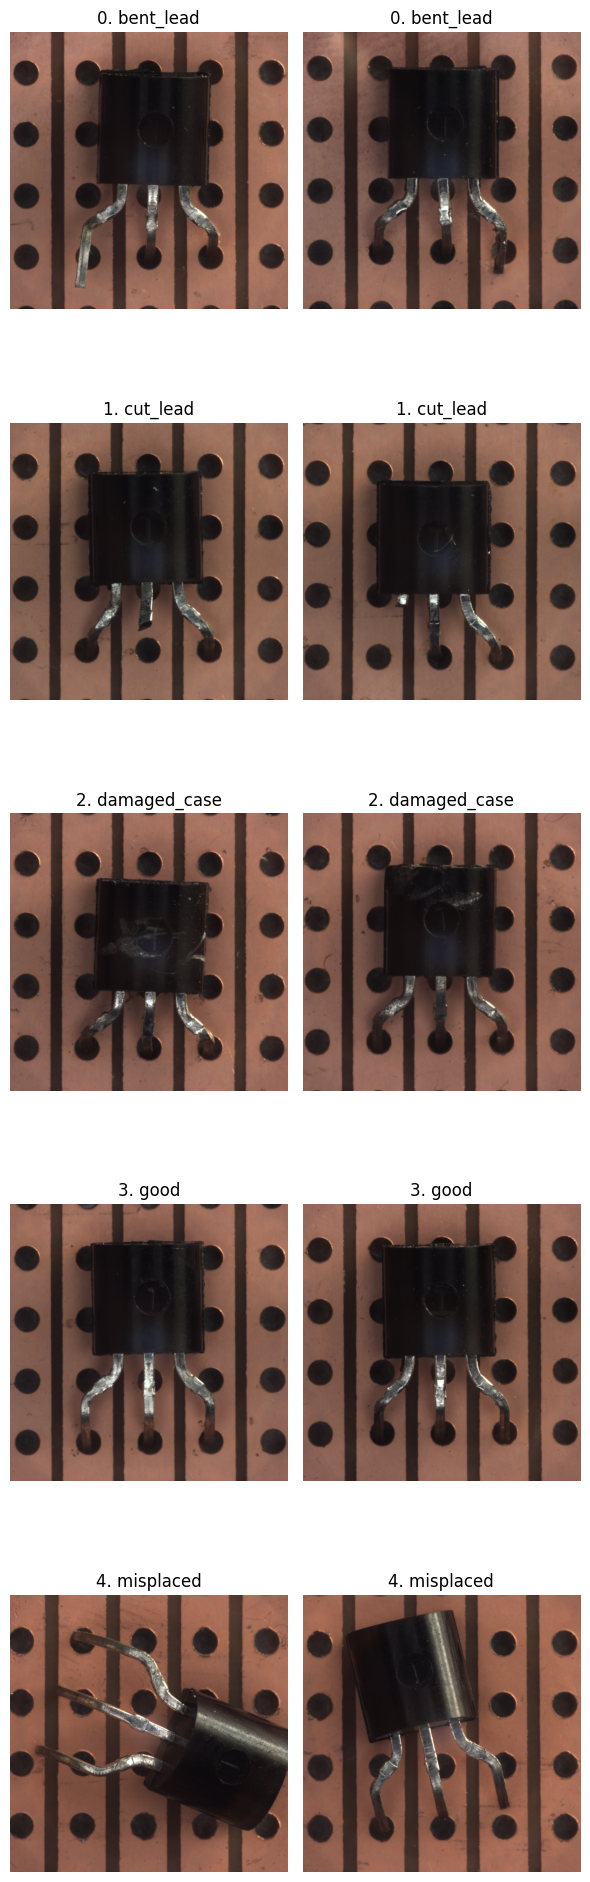

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Ëß£ÊûêÊØèÂºµÂúñÁâáÁöÑÈ°ûÂà•ÂêçÁ®±Ôºå‰∏¶Êï¥ÁêÜÂá∫‰∏çÈáçË§áÁöÑÈ°ûÂà•Ê∏ÖÂñÆ classesÔºåÂÜçÈÄ≤Ë°åÊéíÂ∫è
classes = sorted(set([path.split('/')[9] for path in file_paths])) #Â∞áÊ™îÊ°àË∑ØÂæë‰ª• / ÊãÜÈñãÊàêÂ§öÂÄãÂ≠ó‰∏≤
print(f'Classes: {classes}')

images_per_class = len(all_data) // len(classes)
fig, axs = plt.subplots(len(classes), 2, figsize=(6, 4 * len(classes)))

for i, class_name in enumerate(classes): # ÈáùÂ∞çÊØèÂÄãÈ°ûÂà•ÈÄ≤Ë°åËø¥Âúà
    index = i * images_per_class
    for j in range(2):
        axs[i, j].set_title(f'{i}. {class_name}')
        axs[i, j].imshow(all_data[index + j])
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

## Data Loading and Preprocessing

ÂàáÂàÜÁÇ∫Ë®ìÁ∑¥ÈõÜÂíåÈ©óË≠âÈõÜÔºå‰∏¶Ë£Ω‰ΩúÂ∞çÊáâÁöÑ labelÔºàÊ®ôÁ±§ÔºâÔºåÂêåÊôÇÊääË≥áÊñôÊ†ºÂºèËΩâÊàê PyTorch Ê®°ÂûãË®ìÁ∑¥ÈúÄË¶ÅÁöÑÂΩ¢Âºè„ÄÇ

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

num_classes = 5
images_per_class = 10
train_images_per_class = int(images_per_class * 0.8)
val_images_per_class = int(images_per_class * 0.2)

x_train = []
x_val = []

# Â∞çÊØèÂÄãÈ°ûÂà•ÂÅöÂàáÂàÜÔºåÂàÜÊàêË®ìÁ∑¥/È©óË≠âË≥áÊñô (ÂÅáË®≠ÂúñÁâáÊåâÈ°ûÂà•È†ÜÂ∫èÊéíÂàó)
for i in range(num_classes):
    start_index = i * images_per_class
    x_train.extend(all_data[start_index:start_index + train_images_per_class])
    x_val.extend(all_data[start_index + train_images_per_class:start_index + images_per_class]) #ÊääÂ§öÂºµÂúñÁâáÔºàlistÔºâÂä†ÂÖ•Ê∏ÖÂñÆ‰∏≠

# Â∞áÂΩ±ÂÉèËΩâÊèõÊàê PyTorch Ë¶ÅÊ±ÇÁöÑÊ†ºÂºèÔºåÂæû[batch, height, width, channel] Âà∞ [batch, channel, height, width]
x_train = np.transpose(np.array(x_train), (0, 3, 1, 2))
x_val = np.transpose(np.array(x_val), (0, 3, 1, 2))

# Â∞ç y Ë£Ω‰ΩúÊ®ôÁ±§ÔºàlabelsÔºâ
y_train = np.concatenate([np.full(train_images_per_class, i) for i in range(num_classes)])
y_val = np.concatenate([np.full(val_images_per_class, i) for i in range(num_classes)])

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')


Shape of x_train: (40, 3, 1024, 1024)
Shape of x_val: (10, 3, 1024, 1024)
Shape of y_train: (40,)
Shape of y_val: (10,)


# ‰∏ªÁ®ãÂºèÁ¢º

## Baseline Model : epoch=50„ÄÅbatch_size=32

test_acc=0.4

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Train loss: 1.8625, Train acc: 15.0000%, Val loss: 1.6764, Val acc: 20.0000%, Best Val loss: 1.6764 Best Val acc: 20.00%
Epoch 2/50, Train loss: 1.8117, Train acc: 20.0000%, Val loss: 1.6692, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 3/50, Train loss: 1.8871, Train acc: 12.5000%, Val loss: 1.6694, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 4/50, Train loss: 2.0925, Train acc: 15.0000%, Val loss: 1.7022, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 5/50, Train loss: 1.6507, Train acc: 25.0000%, Val loss: 1.7622, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 6/50, Train loss: 1.7557, Train acc: 32.5000%, Val loss: 1.8443, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 7/50, Train loss: 1.7216, Train acc: 30.0000%, Val loss: 1.9543, Val acc: 20.0000%, Best Val loss: 1.6692 Best Val acc: 20.00%
Epoch 8/50, Train loss: 1.6232, Train acc: 17.5000%, Val loss: 2.0043

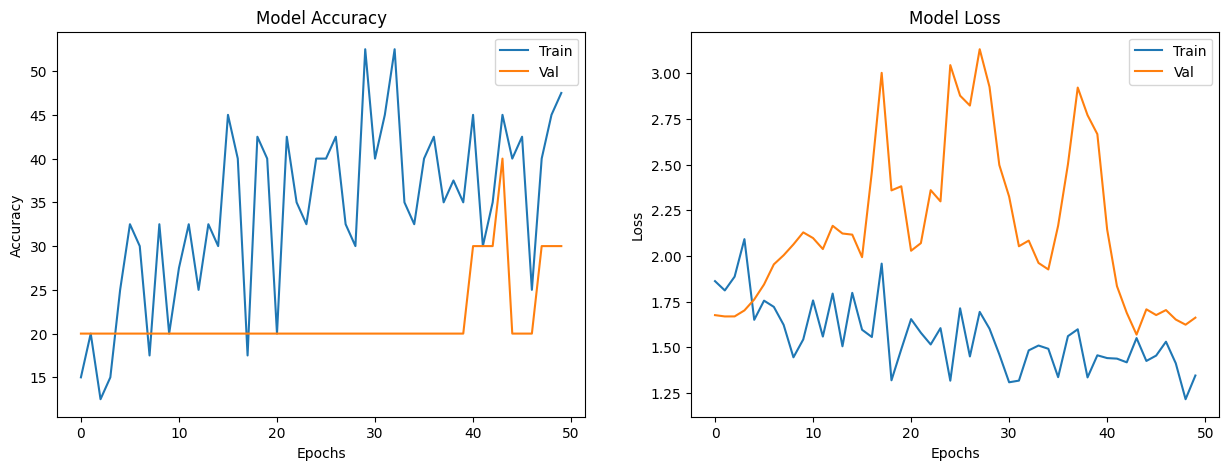

tensor([0, 3, 3, 3, 0, 3, 3, 3, 0, 4], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 40.0%


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 32

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

# ËºâÂÖ• ResNet-18 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç
# ÈÄôÂÄãÊ®°ÂûãÊòØÂú® ImageNetÔºà1000 È°ûÔºâ‰∏äË®ìÁ∑¥ÁöÑ
model = models.resnet18(weights='IMAGENET1K_V1') #weights='IMAGENET1K_V1' Ë°®Á§∫ËºâÂÖ•ÂÆòÊñπÈ†êË®ìÁ∑¥Ê¨äÈáç

# ÂáçÁµêÊï¥ÂÄã ResNet-18 ÁöÑÁâπÂæµÊèêÂèñÈÉ®ÂàÜÔºåË°®Á§∫Ë®ìÁ∑¥ÊôÇÈÄô‰∫õÊ¨äÈáç‰∏çÊúÉË¢´Êõ¥Êñ∞ÔºåÂè™ÊúÉË®ìÁ∑¥„ÄåÊúÄÂæåÈÇ£Â±§ÂàÜÈ°ûÂô®„ÄçÔºå‰∏çÊúÉÂãïÂà∞ÂâçÈù¢Â≠∏Âà∞ÁöÑÁâπÂæµ
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 5

# change # of class from 1000 into 5 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

###########################################   Training the Neural Network   #################################################
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################

# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

## Á¨¨‰∏ÄÈ°å

In [ ]:
import os
from PIL import Image
from collections import defaultdict

dataset_path = '/content/drive/MyDrive/Colab Notebooks/DL_1132/HW3/transistor'  # ‚Üê ÈÄôË£°Ë´ãÊèõÊàê‰Ω†ÂØ¶ÈöõËß£Â£ìË∑ØÂæë

# Ë®àÁÆóË≥áÊñôÂ§æÂÖßÁöÑÂúñÂÉèÂàÜÂ∏É
def count_images(path):
    image_count = 0
    image_sizes = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.png'):
                image_count += 1
                if len(image_sizes) < 10:  # Âè™Ë®òÂâç10ÂºµÁöÑÂ∞∫ÂØ∏‰ΩúÁÇ∫‰ª£Ë°®
                    img = Image.open(os.path.join(root, file))
                    image_sizes.append(img.size)  # (width, height)
    return image_count, image_sizes

# 1. Áº∫Èô∑È°ûÂà•ËàáÈ°ûÂûãÂêçÁ®±ÔºàÂè™Áúã test Â≠êË≥áÊñôÂ§æÔºâ
test_dir = os.path.join(dataset_path, 'test')
defect_classes = sorted(os.listdir(test_dir))
num_defect_classes = len(defect_classes)

# 2. Ë®àÁÆóË®ìÁ∑¥ËàáÊ∏¨Ë©¶ÂúñÁâáÊï∏
train_dir = os.path.join(dataset_path, 'train')
train_dist = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_dist = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

# 3. Ë®àÁÆóÁ∏ΩÂúñÁâáÊï∏
total_train_images, _ = count_images(train_dir)
total_test_images, test_image_sizes = count_images(test_dir)
total_images = total_train_images + total_test_images

# 4. Êï¥ÁêÜÁµêÊûúËº∏Âá∫
print(f'üìå Number of defect classes: {num_defect_classes}')
print(f'üìå Types of defect classes: {defect_classes}')
print(f'üìå Total images used: {total_images}')
print(f'üìå Train distribution: {train_dist}')
print(f'üìå Test distribution: {test_dist}')

# 5. Âç∞Âá∫ÂúñÂÉèÂ∞∫ÂØ∏Áµ±Ë®àÔºàÂèñ test set ÁöÑ 10 ÂºµÁÇ∫ÁØÑ‰æãÔºâ
print(f'üìå Sample image dimensions (from test set):')
for i, size in enumerate(test_image_sizes):
    print(f'   Image {i+1}: {size[0]} x {size[1]}')

üìå Number of defect classes: 5
üìå Types of defect classes: ['bent_lead', 'cut_lead', 'damaged_case', 'good', 'misplaced']
üìå Total images used: 313
üìå Train distribution: {'good': 213}
üìå Test distribution: {'misplaced': 10, 'good': 60, 'damaged_case': 10, 'bent_lead': 10, 'cut_lead': 10}
üìå Sample image dimensions (from test set):
   Image 1: 1024 x 1024
   Image 2: 1024 x 1024
   Image 3: 1024 x 1024
   Image 4: 1024 x 1024
   Image 5: 1024 x 1024
   Image 6: 1024 x 1024
   Image 7: 1024 x 1024
   Image 8: 1024 x 1024
   Image 9: 1024 x 1024
   Image 10: 1024 x 1024


## Á¨¨‰∫åÈ°å

### ÊñπÊ≥ï‰∏Ä : batch_size=32„ÄÅepoch=200„ÄÅrestnet18„ÄÅÊ≤íÊúâÊãøÊéâ/255

test_acc=0.6

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200, Train loss: 1.7113, Train acc: 22.5000%, Val loss: 1.6598, Val acc: 20.0000%, Best Val loss: 1.6598 Best Val acc: 20.00%
Epoch 2/200, Train loss: 1.4946, Train acc: 25.0000%, Val loss: 1.6559, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 3/200, Train loss: 1.7062, Train acc: 27.5000%, Val loss: 1.6784, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 4/200, Train loss: 1.7589, Train acc: 15.0000%, Val loss: 1.7114, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 5/200, Train loss: 1.7147, Train acc: 20.0000%, Val loss: 1.6832, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 6/200, Train loss: 1.6609, Train acc: 27.5000%, Val loss: 1.7049, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 7/200, Train loss: 1.7542, Train acc: 25.0000%, Val loss: 1.6993, Val acc: 20.0000%, Best Val loss: 1.6559 Best Val acc: 20.00%
Epoch 8/200, Train loss: 1.7206, Train acc: 22.5000%, Val loss

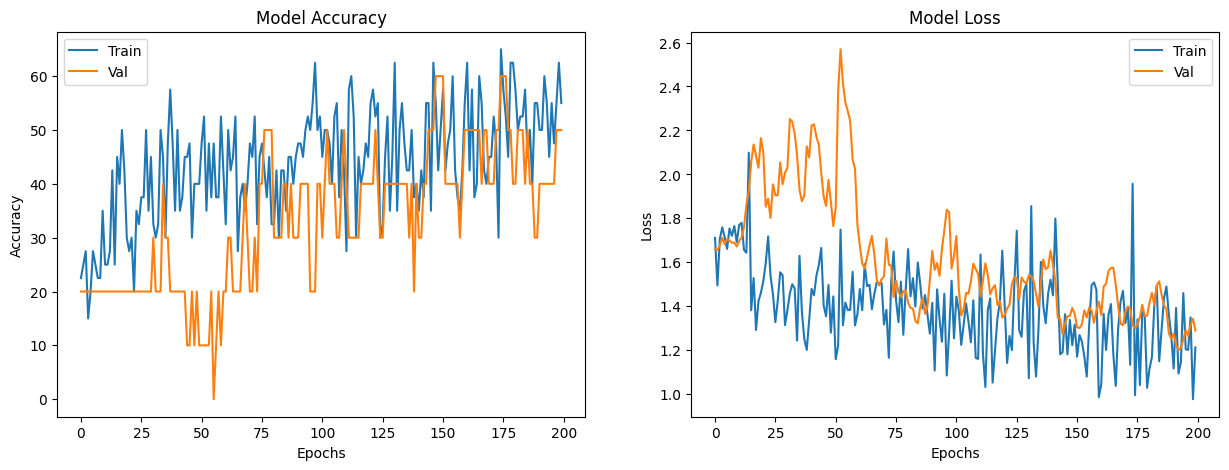

tensor([2, 1, 1, 1, 2, 2, 3, 2, 4, 3], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 60.0%


In [ ]:
##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 32

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################

# ËºâÂÖ• ResNet-18 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç
# ÈÄôÂÄãÊ®°ÂûãÊòØÂú® ImageNetÔºà1000 È°ûÔºâ‰∏äË®ìÁ∑¥ÁöÑ
model = models.resnet18(weights='IMAGENET1K_V1') #weights='IMAGENET1K_V1' Ë°®Á§∫ËºâÂÖ•ÂÆòÊñπÈ†êË®ìÁ∑¥Ê¨äÈáç

# ÂáçÁµêÊï¥ÂÄã ResNet-18 ÁöÑÁâπÂæµÊèêÂèñÈÉ®ÂàÜÔºåË°®Á§∫Ë®ìÁ∑¥ÊôÇÈÄô‰∫õÊ¨äÈáç‰∏çÊúÉË¢´Êõ¥Êñ∞ÔºåÂè™ÊúÉË®ìÁ∑¥„ÄåÊúÄÂæåÈÇ£Â±§ÂàÜÈ°ûÂô®„ÄçÔºå‰∏çÊúÉÂãïÂà∞ÂâçÈù¢Â≠∏Âà∞ÁöÑÁâπÂæµ
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 5

# change # of class from 1000 into 5 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

###########################################   Training the Neural Network   #################################################

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 200
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################
# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

### ÊñπÊ≥ï‰∫å : batch_size=16„ÄÅepoch=50„ÄÅrestnet18„ÄÅÊ≤íÊúâÊãøÊéâ/255

test_acc=0.6

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Train loss: 1.8033, Train acc: 25.0000%, Val loss: 1.6439, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 2/50, Train loss: 1.8009, Train acc: 25.0000%, Val loss: 1.6867, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 3/50, Train loss: 1.7333, Train acc: 15.0000%, Val loss: 1.7030, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 4/50, Train loss: 1.5654, Train acc: 22.5000%, Val loss: 1.6906, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 5/50, Train loss: 1.5192, Train acc: 35.0000%, Val loss: 1.7123, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 6/50, Train loss: 1.7742, Train acc: 20.0000%, Val loss: 1.7853, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 7/50, Train loss: 1.7884, Train acc: 12.5000%, Val loss: 1.9003, Val acc: 20.0000%, Best Val loss: 1.6439 Best Val acc: 20.00%
Epoch 8/50, Train loss: 1.8088, Train acc: 20.0000%, Val loss: 2.2209

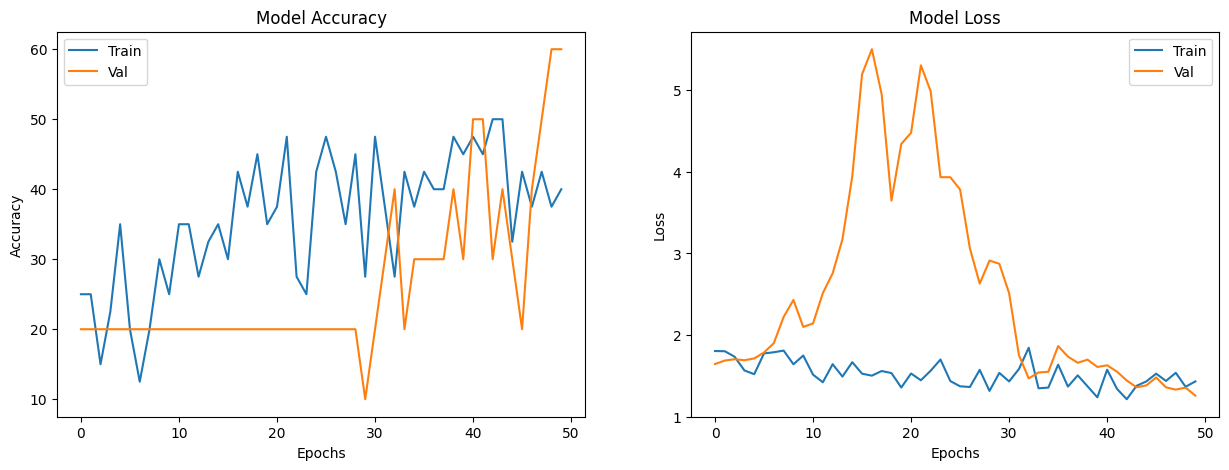

tensor([0, 1, 1, 0, 2, 2, 3, 1, 4, 3], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 60.0%


In [ ]:
##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 16

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################

# ËºâÂÖ• ResNet-18 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç
# ÈÄôÂÄãÊ®°ÂûãÊòØÂú® ImageNetÔºà1000 È°ûÔºâ‰∏äË®ìÁ∑¥ÁöÑ
model = models.resnet18(weights='IMAGENET1K_V1') #weights='IMAGENET1K_V1' Ë°®Á§∫ËºâÂÖ•ÂÆòÊñπÈ†êË®ìÁ∑¥Ê¨äÈáç

# ÂáçÁµêÊï¥ÂÄã ResNet-18 ÁöÑÁâπÂæµÊèêÂèñÈÉ®ÂàÜÔºåË°®Á§∫Ë®ìÁ∑¥ÊôÇÈÄô‰∫õÊ¨äÈáç‰∏çÊúÉË¢´Êõ¥Êñ∞ÔºåÂè™ÊúÉË®ìÁ∑¥„ÄåÊúÄÂæåÈÇ£Â±§ÂàÜÈ°ûÂô®„ÄçÔºå‰∏çÊúÉÂãïÂà∞ÂâçÈù¢Â≠∏Âà∞ÁöÑÁâπÂæµ
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 5

# change # of class from 1000 into 5 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)
#print(model)

###########################################   Training the Neural Network   #################################################

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 50
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################
# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

###ÊñπÊ≥ï‰∏â : batch_size=16„ÄÅepoch=200„ÄÅrestnet50„ÄÅÊ≤íÊúâÊãøÊéâ/255

test_acc=0.7

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200, Train loss: 2.2760, Train acc: 17.5000%, Val loss: 3.8918, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 2/200, Train loss: 2.2213, Train acc: 22.5000%, Val loss: 74.2641, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 3/200, Train loss: 2.9849, Train acc: 22.5000%, Val loss: 357.6481, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 4/200, Train loss: 1.9823, Train acc: 42.5000%, Val loss: 212.6005, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 5/200, Train loss: 1.8600, Train acc: 45.0000%, Val loss: 229.5813, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 6/200, Train loss: 1.6989, Train acc: 27.5000%, Val loss: 360.2703, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 7/200, Train loss: 1.6036, Train acc: 42.5000%, Val loss: 225.8360, Val acc: 20.0000%, Best Val loss: 3.8918 Best Val acc: 20.00%
Epoch 8/200, Train loss: 1.5756, Train acc: 37.5000

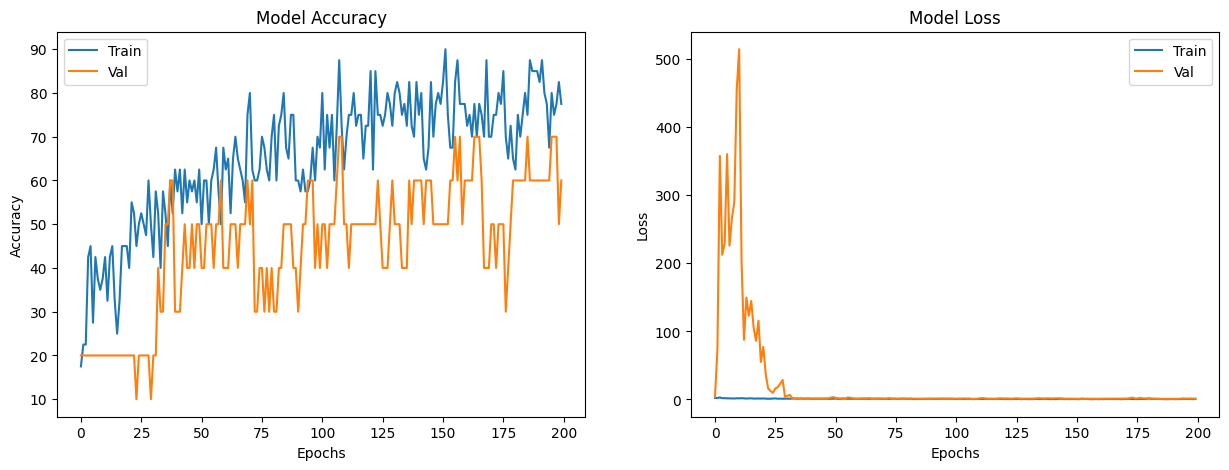

tensor([1, 0, 1, 0, 2, 2, 3, 1, 4, 4], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 70.0%


In [ ]:
##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 16

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################

# ËºâÂÖ• ResNet-50 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç

from torchvision import models

num_class = 5
model = models.resnet50(weights='IMAGENET1K_V1')

# ÂèØÈÅ∏ÊìáÊòØÂê¶ÂáçÁµêÈÉ®ÂàÜÂèÉÊï∏ÔºàÂª∫Ë≠∞Ëß£Âáç layer4 ‰ª•‰∏äÔºâ
for name, param in model.named_parameters():
    if 'layer4' in name or 'fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# ‰øÆÊîπÂàÜÈ°ûÂ±§
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_class)

###########################################   Training the Neural Network   #################################################

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 200
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################
# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

### ÊñπÊ≥ïÂõõ : batch_size=16„ÄÅepoch=200„ÄÅrestnet18„ÄÅÊãøÊéâ/255

test_acc=0.8

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200, Train loss: 1.8515, Train acc: 17.5000%, Val loss: 1.5602, Val acc: 30.0000%, Best Val loss: 1.5602 Best Val acc: 30.00%
Epoch 2/200, Train loss: 1.6089, Train acc: 30.0000%, Val loss: 1.5633, Val acc: 30.0000%, Best Val loss: 1.5602 Best Val acc: 30.00%
Epoch 3/200, Train loss: 1.7224, Train acc: 22.5000%, Val loss: 1.5486, Val acc: 30.0000%, Best Val loss: 1.5486 Best Val acc: 30.00%
Epoch 4/200, Train loss: 1.8733, Train acc: 17.5000%, Val loss: 1.5282, Val acc: 40.0000%, Best Val loss: 1.5282 Best Val acc: 40.00%
Epoch 5/200, Train loss: 1.6208, Train acc: 25.0000%, Val loss: 1.4965, Val acc: 70.0000%, Best Val loss: 1.4965 Best Val acc: 70.00%
Epoch 6/200, Train loss: 1.6731, Train acc: 37.5000%, Val loss: 1.4642, Val acc: 60.0000%, Best Val loss: 1.4642 Best Val acc: 70.00%
Epoch 7/200, Train loss: 1.6347, Train acc: 42.5000%, Val loss: 1.4347, Val acc: 60.0000%, Best Val loss: 1.4347 Best Val acc: 70.00%
Epoch 8/200, Train loss: 1.6823, Train acc: 27.5000%, Val loss

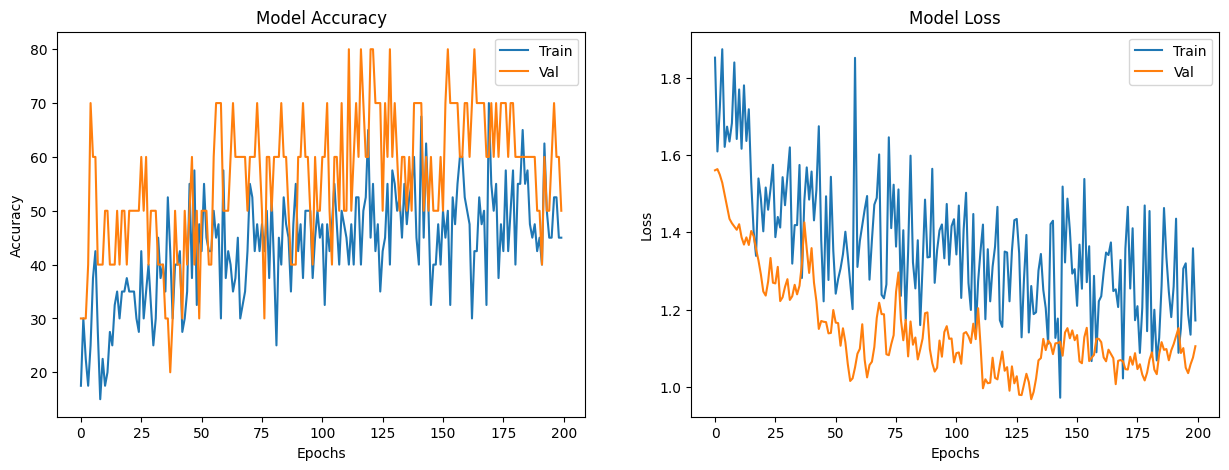

tensor([0, 0, 1, 0, 2, 2, 3, 2, 4, 4], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 80.0%


In [ ]:
##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 16

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################

# ËºâÂÖ• ResNet-18 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç
# ÈÄôÂÄãÊ®°ÂûãÊòØÂú® ImageNetÔºà1000 È°ûÔºâ‰∏äË®ìÁ∑¥ÁöÑ

num_class = 5
model = models.resnet18(weights='IMAGENET1K_V1') #weights='IMAGENET1K_V1' Ë°®Á§∫ËºâÂÖ•ÂÆòÊñπÈ†êË®ìÁ∑¥Ê¨äÈáç

# ÂáçÁµêÊï¥ÂÄã ResNet-18 ÁöÑÁâπÂæµÊèêÂèñÈÉ®ÂàÜÔºåË°®Á§∫Ë®ìÁ∑¥ÊôÇÈÄô‰∫õÊ¨äÈáç‰∏çÊúÉË¢´Êõ¥Êñ∞ÔºåÂè™ÊúÉË®ìÁ∑¥„ÄåÊúÄÂæåÈÇ£Â±§ÂàÜÈ°ûÂô®„ÄçÔºå‰∏çÊúÉÂãïÂà∞ÂâçÈù¢Â≠∏Âà∞ÁöÑÁâπÂæµ
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 5

# change # of class from 1000 into 5 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)


###########################################   Training the Neural Network   #################################################

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 200
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images)
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images)
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################
# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images)

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

### ÊñπÊ≥ï‰∫î : batch_size=16„ÄÅepoch=200„ÄÅrestnet18„ÄÅÊãøÊéâ/255„ÄÅ‰ΩøÁî® FocalLoss ËôïÁêÜË≥áÊñô‰∏çÂπ≥Ë°°

test_acc=0.8

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200, Train loss: 0.3138, Train acc: 27.5000%, Val loss: 0.2829, Val acc: 20.0000%, Best Val loss: 0.2829 Best Val acc: 20.00%
Epoch 2/200, Train loss: 0.3481, Train acc: 17.5000%, Val loss: 0.2763, Val acc: 10.0000%, Best Val loss: 0.2763 Best Val acc: 20.00%
Epoch 3/200, Train loss: 0.3098, Train acc: 25.0000%, Val loss: 0.2791, Val acc: 10.0000%, Best Val loss: 0.2763 Best Val acc: 20.00%
Epoch 4/200, Train loss: 0.3339, Train acc: 17.5000%, Val loss: 0.2783, Val acc: 0.0000%, Best Val loss: 0.2763 Best Val acc: 20.00%
Epoch 5/200, Train loss: 0.3507, Train acc: 17.5000%, Val loss: 0.2739, Val acc: 20.0000%, Best Val loss: 0.2739 Best Val acc: 20.00%
Epoch 6/200, Train loss: 0.2455, Train acc: 35.0000%, Val loss: 0.2578, Val acc: 30.0000%, Best Val loss: 0.2578 Best Val acc: 30.00%
Epoch 7/200, Train loss: 0.3716, Train acc: 10.0000%, Val loss: 0.2562, Val acc: 10.0000%, Best Val loss: 0.2562 Best Val acc: 30.00%
Epoch 8/200, Train loss: 0.2871, Train acc: 20.0000%, Val loss:

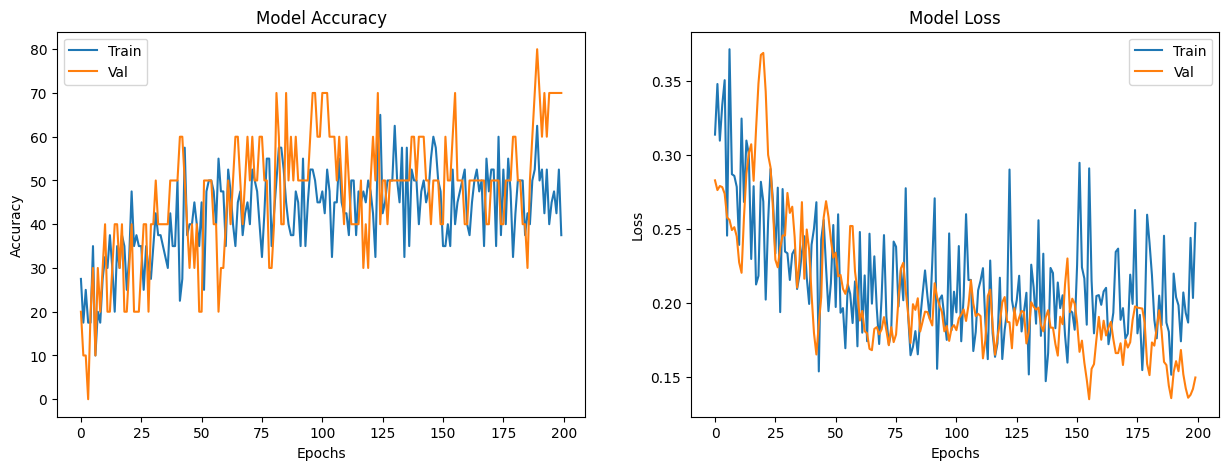

tensor([0, 0, 1, 0, 2, 2, 3, 2, 4, 4], device='cuda:0')
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], device='cuda:0')
Test accuracy is 80.0%


In [ ]:
##################################    Âª∫Á´ãËá™Ë®ÇÁöÑ PyTorch Dataset È°ûÂà•Ôºå‰∏¶‰ΩøÁî® torchvision ÁöÑË≥áÊñôÂ¢ûÂº∑ÔºàtransformÔºâÈÄ≤Ë°åË®ìÁ∑¥ËàáÈ©óË≠âË≥áÊñôÁöÑËôïÁêÜ„ÄÇ   #################################################
# ÂÆöÁæ©Ë®ìÁ∑¥Ë≥áÊñôËàáÈ©óË≠âË≥áÊñôÁöÑ transformsÔºàËΩâÊèõ/Â¢ûÂº∑Êìç‰ΩúÔºâ
train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),         # Â∞áÂΩ±ÂÉèÁ∏ÆÊîæËá≥ 32x32ÔºàÁµ±‰∏ÄÂ∞∫ÂØ∏Ôºâ
        transforms.AutoAugment(),            # Ëá™ÂãïË≥áÊñôÂ¢ûÂº∑Á≠ñÁï•ÔºàÈö®Ê©üÊóãËΩâ„ÄÅÂ∞çÊØî„ÄÅË£ÅÂàáÁ≠âÔºâ
        transforms.RandomHorizontalFlip(),   # Èö®Ê©üÊ∞¥Âπ≥ÁøªËΩâ
        transforms.ToTensor(),               # ËΩâÊèõÁÇ∫ PyTorch tensor ‰∏¶Ê≠£Ë¶èÂåñËá≥ [0, 1]
    ]
)

# È©óË≠âÈõÜÔºöÂè™ÈúÄÁ∏ÆÊîæËàáËΩâÊàê tensorÔºå‰∏çÈúÄÂÅöÂ¢ûÂº∑Ôºå‰ª•Á¢∫‰øùË©ï‰º∞Á©©ÂÆö„ÄÇ
val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

# ÁπºÊâø torch.utils.data.DatasetÔºåËá™Ë®ÇÂ¶Ç‰ΩïËÆÄË≥áÊñô„ÄÅËÆÄÂπæÁ≠Ü„ÄÅÂÅö transform
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x                   # ÂΩ±ÂÉèË≥áÊñôÔºàÂΩ¢ÁãÄÁÇ∫ [N, C, H, W]Ôºâ
        self.y = torch.from_numpy(y).long()       # Ê®ôÁ±§ËΩâÊàê PyTorch tensorÔºàÈï∑Êï¥Êï∏ÂûãÔºâ
        self.transform = transform            # Ë¶ÅÂ•óÁî®ÁöÑ transformÔºàÂèØÁÇ∫ train Êàñ valÔºâ

    def __len__(self):
        return len(self.x) # ÂëäË®¥ PyTorch ÈÄôÂÄãË≥áÊñôÈõÜ‰∏≠ÊúâÂ§öÂ∞ëÁ≠ÜË≥áÊñô

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0)) # Âæû [C, H, W] ËΩâÂõû [H, W, C]ÔºàÁµ¶PILÁî®ÔºâÔºåPIL.Image.fromarray() Ë¶ÅÂêÉ [H, W, C] Ê†ºÂºèÔºåÊâÄ‰ª•Ë¶Å transpose
        return self.transform(Image.fromarray(new_x)), self.y[idx]

# ÂÆöÁæ© batch_size
batch_size = 16

#‰ΩøÁî®Ëá™Ë®ÇÁöÑ MyDataset È°ûÂà•ÔºåÂ∞áË≥áÊñôËàáÂ∞çÊáâÁöÑ transform ÂÇ≥ÈÄ≤Âéª
train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

#Âª∫Á´ã DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

##########################################  Defining Neural Networks   #################################################

# ËºâÂÖ• ResNet-18 È†êË®ìÁ∑¥Ê®°ÂûãÔºåÂèØ‰ª•Áî®ÈÄôÂÄãÊ®°ÂûãÈÄ≤Ë°å„ÄåÁâπÂæµÊèêÂèñ„ÄçÊàñ„ÄåÂæÆË™ø„Äç
# ÈÄôÂÄãÊ®°ÂûãÊòØÂú® ImageNetÔºà1000 È°ûÔºâ‰∏äË®ìÁ∑¥ÁöÑ

num_class = 5
model = models.resnet18(weights='IMAGENET1K_V1') #weights='IMAGENET1K_V1' Ë°®Á§∫ËºâÂÖ•ÂÆòÊñπÈ†êË®ìÁ∑¥Ê¨äÈáç

# ÂáçÁµêÊï¥ÂÄã ResNet-18 ÁöÑÁâπÂæµÊèêÂèñÈÉ®ÂàÜÔºåË°®Á§∫Ë®ìÁ∑¥ÊôÇÈÄô‰∫õÊ¨äÈáç‰∏çÊúÉË¢´Êõ¥Êñ∞ÔºåÂè™ÊúÉË®ìÁ∑¥„ÄåÊúÄÂæåÈÇ£Â±§ÂàÜÈ°ûÂô®„ÄçÔºå‰∏çÊúÉÂãïÂà∞ÂâçÈù¢Â≠∏Âà∞ÁöÑÁâπÂæµ
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
num_class = 5

# change # of class from 1000 into 5 in the last layer
model.fc = nn.Linear(num_ftrs, num_class)

# ‰ΩøÁî® FocalLoss ËôïÁêÜË≥áÊñô‰∏çÂπ≥Ë°°ÁöÑÂïèÈ°å
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        logpt = F.log_softmax(inputs, dim=1)
        pt = torch.exp(logpt)
        logpt = logpt.gather(1, targets.unsqueeze(1)).squeeze(1)
        pt = pt.gather(1, targets.unsqueeze(1)).squeeze(1)
        loss = -self.alpha * (1 - pt) ** self.gamma * logpt
        return loss.mean() if self.reduction == 'mean' else loss.sum()


###########################################   Training the Neural Network   #################################################

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 200
model = model.cuda()

#ÂàùÂßãÂåñÊúÄ‰Ω≥È©óË≠â loss Ëàá accÔºåÁî®‰æÜÂÑ≤Â≠òË°®ÁèæÊúÄÂ•ΩÁöÑÊ®°Âûã
best_val_loss = float('inf')
best_val_acc = -1

#ÊêçÂ§±ÂáΩÊï∏ËàáÂÑ™ÂåñÂô®Ë®≠ÂÆö
#criterion = nn.CrossEntropyLoss() #‰∫§ÂèâÁÜµÊêçÂ§±ÂáΩÊï∏
criterion = FocalLoss(gamma=2.0, alpha=0.25)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#‰ΩøÁî®È§òÂº¶ÈÄÄÁÅ´Â≠∏ÁøíÁéáÔºàCosine AnnealingÔºâÔºåËÆìÂ≠∏ÁøíÁéáÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÊÖ¢ÊÖ¢‰∏ãÈôçËá≥ eta_min=0
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

#Epoch Ë®ìÁ∑¥ËàáÈ©óË≠â‰∏ªËø¥Âúà
for epoch in tqdm(range(epochs)):
    # Training
    model.train() #Ê®°ÂûãË®≠ÁÇ∫Ë®ìÁ∑¥Ê®°ÂºèÔºàÂïüÁî® dropout„ÄÅBNÔºâ
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda() #ÊääË≥áÊñôËàáÊ®ôÁ±§ÈÄÅÈÄ≤ GPU
        images = (images)
        labels = labels.cuda()
        optimizer.zero_grad() #Âü∑Ë°å forward pass
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels) #Ë®àÁÆóÊêçÂ§±
        loss.backward() #ÂèçÂêëÂÇ≥Êí≠
        optimizer.step() #Êõ¥Êñ∞ÂèÉÊï∏
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images)
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate updateÔºåÊ†πÊìöÈ§òÂº¶ÈÄÄÁÅ´Á≠ñÁï•Ë™øÊï¥Â≠∏ÁøíÁéá
    lr_scheduler.step()

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

##########################################   Visualizing model performance   ##########################################

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

#########################   Load Trained Model and Evaluate   ############################
# ËºâÂÖ•Â∑≤ÂÑ≤Â≠òÁöÑÊúÄ‰Ω≥Ê®°ÂûãÂèÉÊï∏
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad(): # ÂëäË®¥ PyTorchÔºö„Äå‰ª•‰∏ãÁ®ãÂºèÁ¢º‰∏çÈúÄË¶ÅË®àÁÆóÊ¢ØÂ∫¶„ÄçÔºåÈÄôÊ®£ÂèØ‰ª•ÁØÄÁúÅË®òÊÜ∂È´îËàáÂä†ÈÄüÊé®Ë´ñÔºàinferenceÔºâ„ÄÇ

    for images, labels in val_loader:

        images = images.cuda()
        images = (images)

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')